In [248]:
import os
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn 
from keras.utils import to_categorical

In [10]:
file = os.path.join("data", "notex_all.csv")

data = pd.read_csv(file, delimiter='\t')

In [303]:
# take a sample of records to play with
small_num = 50_000
sample = data[:small_num]

text = sample.text
label = sample.label

text_train = text[:small_num//2]
text_test = text[small_num//2:]

label_e = LabelEncoder()
y_train = to_categorical(label_e.fit_transform(label[:small_num//2]))
y_test = to_categorical(label_e.transform(label[small_num//2:]))

In [258]:
text_train[:3]

0    On the interplay between star formation and fe...
1    Transversal Homotopy Monoids of Complex Projec...
2    Remarks on some typical assumptions in dynamo ...
Name: text, dtype: object

In [257]:
y_train[:3]

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [115]:
# compute class weights for keras (obtained from the whole of train sample)

n_classes = len(np.unique(label_train))

from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(label), label)  # ~ 1 / np.unique(label, return_counts=True)[1]
class_weights

array([ 1.24415248,  0.72824725,  0.27688252, 12.91989664, 32.05128205,
        9.72384286])

In [118]:
# see how many unique words are there globally (unique_words)
# and how many words are in the longest text (max_word_count)
# save the annoyingly confusing integers to feed later into keras

count_v = CountVectorizer(min_df = 1, strip_accents='unicode')
word_counts_train = count_v.fit_transform(notex_text_train)

unique_words = word_counts_train.shape[1]
num_words = unique_words + 1
max_word_count = np.max(np.sum(word_counts_train, axis=1))
padded_length = int(1.05*max_word_count)

print(f"Counted {unique_words} unique words in the whole train dataset.")
print(f"Take numbers 1 to 'num_words'={num_words} as numerical labels for the unique words, and 0 for 'silence'.")
print(f"A single record has at most {max_word_count} words.")
print(f"The text will be tokenized into sequences of numerical labels and put into arrays of length \
'padded_length'={padded_length} left-padded with zeros. The extra 5% of length is there in case a longer text \
would need to be tokenized and classified later (e.g. from a test dataset).")

Counted 25685 unique words in the whole train dataset.
Take numbers 1 to 'num_words'=25686 as numerical labels for the unique words, and 0 for 'silence'.
A single record has at most 434 words.
The text will be tokenized into sequences of numerical labels and put into arrays of length 'padded_length'=455 left-padded with zeros. The extra 5% of length is there in case a longer text would need to be tokenized and classified later (e.g. from a test dataset).


In [119]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [301]:
tokenizer = Tokenizer(num_words=unique_words, lower=True)
tokenizer.fit_on_texts(text_train)

sequences_train = tokenizer.texts_to_sequences(text_train)
sequences_test = tokenizer.texts_to_sequences(text_test)

In [121]:
text_train[0]

'On the interplay between star formation and feedback in galaxy formation simulations.  We investigate the star formation-feedback cycle in cosmological galaxy formation simulations, focusing on progenitors of Milky Way (MW)-sized galaxies. We find that in order to reproduce key properties of the MW progenitors, such as semi-empirically derived star formation histories and the shape of rotation curves, our implementation of star formation and stellar feedback requires 1) a combination of local early momentum feedback via radiation pressure and stellar winds and subsequent efficient supernovae feedback, and 2) efficacy of feedback that results in self-regulation of the global star formation rate on kiloparsec scales. We show that such feedback-driven self-regulation is achieved globally for a local star formation efficiency per free fall time of  _LATEX_ . Although this value is larger that the  _LATEX_  value usually inferred from the Kennicutt-Schmidt (KS) relation, we show that it is

In [122]:
sequences_train[0]

[13,
 1,
 2232,
 39,
 155,
 198,
 3,
 955,
 5,
 257,
 198,
 202,
 7,
 232,
 1,
 155,
 198,
 955,
 1312,
 5,
 541,
 257,
 198,
 202,
 1919,
 13,
 3229,
 2,
 1967,
 294,
 4961,
 2981,
 154,
 7,
 82,
 11,
 5,
 54,
 6,
 1929,
 543,
 77,
 2,
 1,
 4961,
 3229,
 45,
 17,
 769,
 3676,
 303,
 155,
 198,
 4433,
 3,
 1,
 653,
 2,
 791,
 695,
 27,
 975,
 2,
 155,
 198,
 3,
 271,
 955,
 1136,
 33,
 4,
 1000,
 2,
 120,
 781,
 345,
 955,
 266,
 531,
 643,
 3,
 271,
 2863,
 3,
 2484,
 352,
 1950,
 955,
 3,
 44,
 5711,
 2,
 955,
 11,
 29,
 5,
 269,
 5712,
 2,
 1,
 408,
 155,
 198,
 175,
 13,
 10605,
 647,
 7,
 30,
 11,
 45,
 955,
 585,
 269,
 5712,
 8,
 1004,
 2708,
 9,
 4,
 120,
 155,
 198,
 635,
 1025,
 212,
 3051,
 37,
 2,
 10,
 728,
 16,
 249,
 8,
 532,
 11,
 1,
 10,
 249,
 1538,
 2296,
 19,
 1,
 13267,
 5386,
 3351,
 376,
 7,
 30,
 11,
 26,
 8,
 301,
 12,
 437,
 1116,
 587,
 2,
 10,
 5,
 435,
 1334,
 546,
 7,
 30,
 11,
 202,
 12,
 120,
 635,
 2,
 10,
 1929,
 1,
 408,
 116,
 3351,
 376,
 45,
 202,


In [313]:
X_train = pad_sequences(sequences_train, maxlen=padded_length)
X_test = pad_sequences(sequences_test, maxlen=padded_length)

In [124]:
X_train[0][:250]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [125]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, GlobalAveragePooling1D, Dense

In [295]:
from keras import backend as K

def macroF1(y_true, y_pred):
    
    def recall(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
        actual_ones = K.sum(K.round(K.clip(y_true, 0, 1)), axis=0)
        recall = true_positives / (actual_ones + K.epsilon())
        return recall

    
    def precision(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=0)
        positives = K.sum(K.round(K.clip(y_pred, 0, 1)), axis=0)
        precision = true_positives / (positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    macroF1 = K.mean( 2*((precision*recall)/(precision+recall+K.epsilon())) )
    
    return macroF1

def macroF1_flip(y_true, y_pred):
    # a custom loss function
    # no clippping or rounding as those are not differentiable
    
    def recall(y_true, y_pred):

        true_positives = K.sum(y_true * y_pred, axis=0)
        actual_ones = K.sum(y_true, axis=0)
        recall = true_positives / (actual_ones + K.epsilon())
        return recall

    
    def precision(y_true, y_pred):
        
        true_positives = K.sum(y_true * y_pred, axis=0)
        positives = K.sum(y_pred, axis=0)
        precision = true_positives / (positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    macroF1 = K.mean( 2*((precision*recall)/(precision+recall+K.epsilon())) ) 
    
    return 1-macroF1

In [296]:
# https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
from keras import backend as K

def microF1(y_true, y_pred):
    
    def recall(y_true, y_pred):

        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    microF1 = 2*((precision*recall)/(precision+recall+K.epsilon()))
    
    return microF1

In [297]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=300, input_length=padded_length))
model.add(GlobalAveragePooling1D())
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss=macroF1_flip, optimizer='adam', metrics=[microF1, macroF1]) # 'categorical_accuracy', 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 455, 300)          7705800   
_________________________________________________________________
global_average_pooling1d_15  (None, 300)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 1806      
Total params: 7,707,606
Trainable params: 7,707,606
Non-trainable params: 0
_________________________________________________________________


In [298]:
from keras.callbacks import Callback, ReduceLROnPlateau, EarlyStopping

In [299]:
callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=2)
#     ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]

history = model.fit(
    X_train, y_train,
    class_weight=class_weights,
    epochs=100,
    batch_size=1000,
    validation_split=0.1,
    callbacks=callbacks,
    verbose = 1
)

Train on 22500 samples, validate on 2500 samples
Epoch 1/100
22500/22500 [==============================] - 22s 969us/step - loss: 0.8791 - microF1: 0.0000e+00 - macroF1: 0.0000e+00 - val_loss: 0.8683 - val_microF1: 0.0000e+00 - val_macroF1: 0.0000e+00
Epoch 2/100
22500/22500 [==============================] - 20s 896us/step - loss: 0.8545 - microF1: 0.0000e+00 - macroF1: 0.0000e+00 - val_loss: 0.8434 - val_microF1: 0.0000e+00 - val_macroF1: 0.0000e+00
Epoch 3/100
22500/22500 [==============================] - 21s 927us/step - loss: 0.8344 - microF1: 0.3619 - macroF1: 0.0782 - val_loss: 0.8295 - val_microF1: 0.6035 - val_macroF1: 0.1257
Epoch 4/100
22500/22500 [==============================] - 20s 903us/step - loss: 0.8244 - microF1: 0.6090 - macroF1: 0.1269 - val_loss: 0.8211 - val_microF1: 0.6177 - val_macroF1: 0.1283
Epoch 5/100
22500/22500 [==============================] - 20s 903us/step - loss: 0.8153 - microF1: 0.6205 - macroF1: 0.1298 - val_loss: 0.8101 - val_microF1: 0.6616 -

Epoch 44/100
22500/22500 [==============================] - 22s 967us/step - loss: 0.2029 - microF1: 0.9305 - macroF1: 0.8421 - val_loss: 0.3730 - val_microF1: 0.9143 - val_macroF1: 0.6629
Epoch 45/100
22500/22500 [==============================] - 22s 968us/step - loss: 0.1922 - microF1: 0.9317 - macroF1: 0.8504 - val_loss: 0.3720 - val_microF1: 0.9144 - val_macroF1: 0.6634
Epoch 46/100
22500/22500 [==============================] - 23s 1ms/step - loss: 0.1874 - microF1: 0.9324 - macroF1: 0.8573 - val_loss: 0.3712 - val_microF1: 0.9142 - val_macroF1: 0.6633
Epoch 47/100
22500/22500 [==============================] - 22s 994us/step - loss: 0.1792 - microF1: 0.9332 - macroF1: 0.8639 - val_loss: 0.3657 - val_microF1: 0.9143 - val_macroF1: 0.6741
Epoch 48/100
22500/22500 [==============================] - 22s 958us/step - loss: 0.1737 - microF1: 0.9341 - macroF1: 0.8688 - val_loss: 0.3701 - val_microF1: 0.9141 - val_macroF1: 0.6589
Epoch 49/100
22500/22500 [==============================]

In [314]:
np.shape(X_test)

(25000, 455)

In [315]:
model.evaluate(X_test, y_test)

25000/25000 [==============================] - 6s 254us/step


[0.5094182186126709, 0.9034493243217468, 0.49392583874702456]

In [54]:
np.unique(predicted_label_test)

array(['cs', 'math', 'phys', 'q-bio', 'stat'], dtype=object)

In [48]:
np.array(label_test)

array(['q-fin', 'phys', 'cs', ..., 'phys', 'phys', 'math'], dtype=object)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [113]:
f1_score(np.array(label_test), predicted_label_test, average='macro')

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.42252345213456693

In [351]:
all_metrics = np.array(list(set(history.history.keys()) - set(['loss', 'val_loss', 'lr'])))  # WTF is lr?
metrics

array(['val_macroF1', 'microF1', 'macroF1', 'val_microF1'], dtype='<U11')

In [352]:
metrics[[not metric.startswith('val_') for metric in metrics]]

array(['microF1', 'macroF1'], dtype='<U11')

In [359]:
['*',  'o', 'd']

['*', 'o', 'd', '*', 'o', 'd']

In [361]:
markers = ['*',  'o', 'd']
marker = zip(markers, markers)
list(marker)

[('*', '*'), ('o', 'o'), ('d', 'd')]

In [362]:
import matplotlib.pyplot as plt

def plot_history(history):
    
    plt.figure(figsize=(12, 5))
    
    loss = history.history['loss']
    x = range(1, len(loss) + 1)
    val_loss = history.history['val_loss']
    plt.subplot(1, 2, 1)    
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')  
    plt.legend()
    
    all_metrics = np.array(list(set(history.history.keys()) - set(['loss', 'val_loss', 'lr'])))
    metrics = all_metrics[[not metric.startswith('val_') for metric in all_metrics]]
    plt.subplot(1, 2, 2)
    markers = ['*',  'o', 'd']
    marker = zip(markers, markers)
    for metric in metrics:
        results = history.history[metric]
        val_results = history.history['val_'+metric]
        mark1, mark2 = next(marker)
        plt.plot(x, results, 'b'+mark1, label=metric)
        plt.plot(x, val_results, 'r'+mark2, label='Validation '+metric)
        plt.title('Training and validation metrics')
        
    plt.legend()

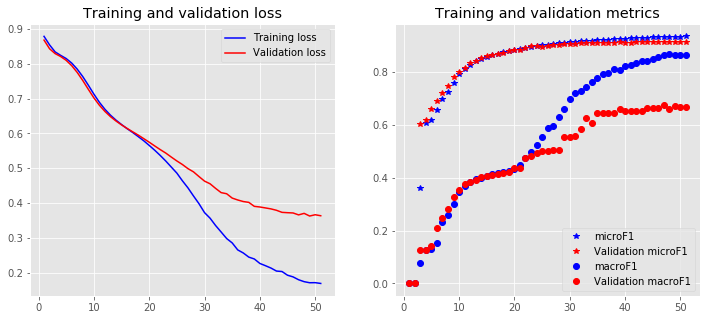

In [363]:
plt.style.use('ggplot')
plot_history(history)